In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 1000
D = 2

In [37]:
R_inner = 5.0
R_outer = 10.0

R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

In [38]:
R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])


In [39]:
T = np.array([0]*(N//2) + [1]*(N//2))

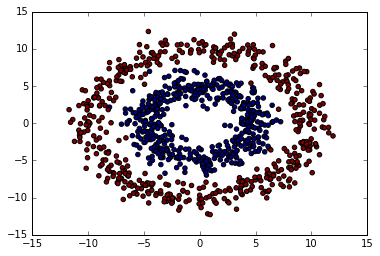

In [40]:
plt.scatter(X[:,0], X[:,1], c=T);
# No line that will separate these classes. This demo will
# show that this is indeed possible

In [47]:
ones

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

1862.86600359
484.146822984
379.135879489
311.727841491
265.711730175
232.586390182
207.693146095
188.330192503
172.843977055
160.17351587
149.609856533
140.662562133
132.982122816
126.312991614
120.464116083
115.289852251
110.677251582
106.537379693
102.799255254
99.4055333512
96.3093757901
93.4721449912
90.8616796457
88.4509880188
86.2172455608
84.1410172814
82.2056482202
80.3967810959
78.7019712067
77.1103764404
75.6125058281
74.2000141257
72.8655328737
71.6025305853
70.4051963594
69.2683424566
68.1873223227
67.1579612708
66.1764975937
65.2395323166
64.3439861438
63.4870624212
62.6662151565
61.879121304
61.1236566663
60.3978748699
59.6999889672
59.0283552877
58.3814592237
57.7579026843
Final w: [ -1.18150702e+01   1.59617686e+00   1.04823123e-02  -1.94831560e-02]
Final classification rate: 0.992


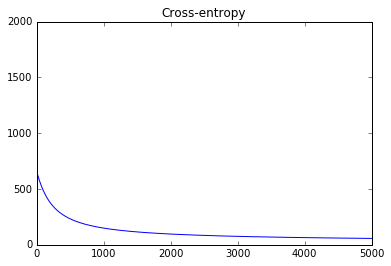

In [46]:
ones = np.array([[1]*N]).T

r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
Xb = np.concatenate((ones, r, X), axis=1)

w = np.random.rand(D+2)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)
        
    w += learning_rate * ( np.dot((T-Y).T, Xb) - 0.01*w )
    
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error);
plt.title("Cross-entropy");
    
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T- np.round(Y)).sum() / N)
    
    
    

- The last to weights are very small - the accuracy doesn't depend on x or y coordinates, it only depends on the bias and the radius
- As the radius goes towards zero we push the classification towards 0, and as it increases we get more classification of 1s